In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
os.chdir('/home/esther/Desktop/BehavioralTraining/code')

from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices

from scoringFunctions import scoreChoices
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import scorePerPhase

from analysisFunctions import testRTbasedOnPhaseScoring

from rtDistFunctions import computeDensityPerPhase

from plottingFunctions import plotIt

In [4]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

#%% LOAD IN DATA
Adat,Mdat = loadData()

In [5]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

preprocessingFunctions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/esther/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
preprocessingFunctions.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# LOAD IN REACTION TIMES AND REMOVE CANCELLED AND TIMED OUT TRIALS
rt_raw = Adat.xs('reaction_time',level = 1, axis = 1)
#rtChoicesFilter = rt_raw[~np.isnan(choices)] # shouldn't need to do this as reaction times are masked by correct and incorrect (Which are already filtered)
rt = rt_raw[rt_raw > 100] # only include trials where researcher did not give reward before sensors were activated 

In [8]:
# determine which trials were correct and incorrect come from sensor scores only
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(choices, sides)

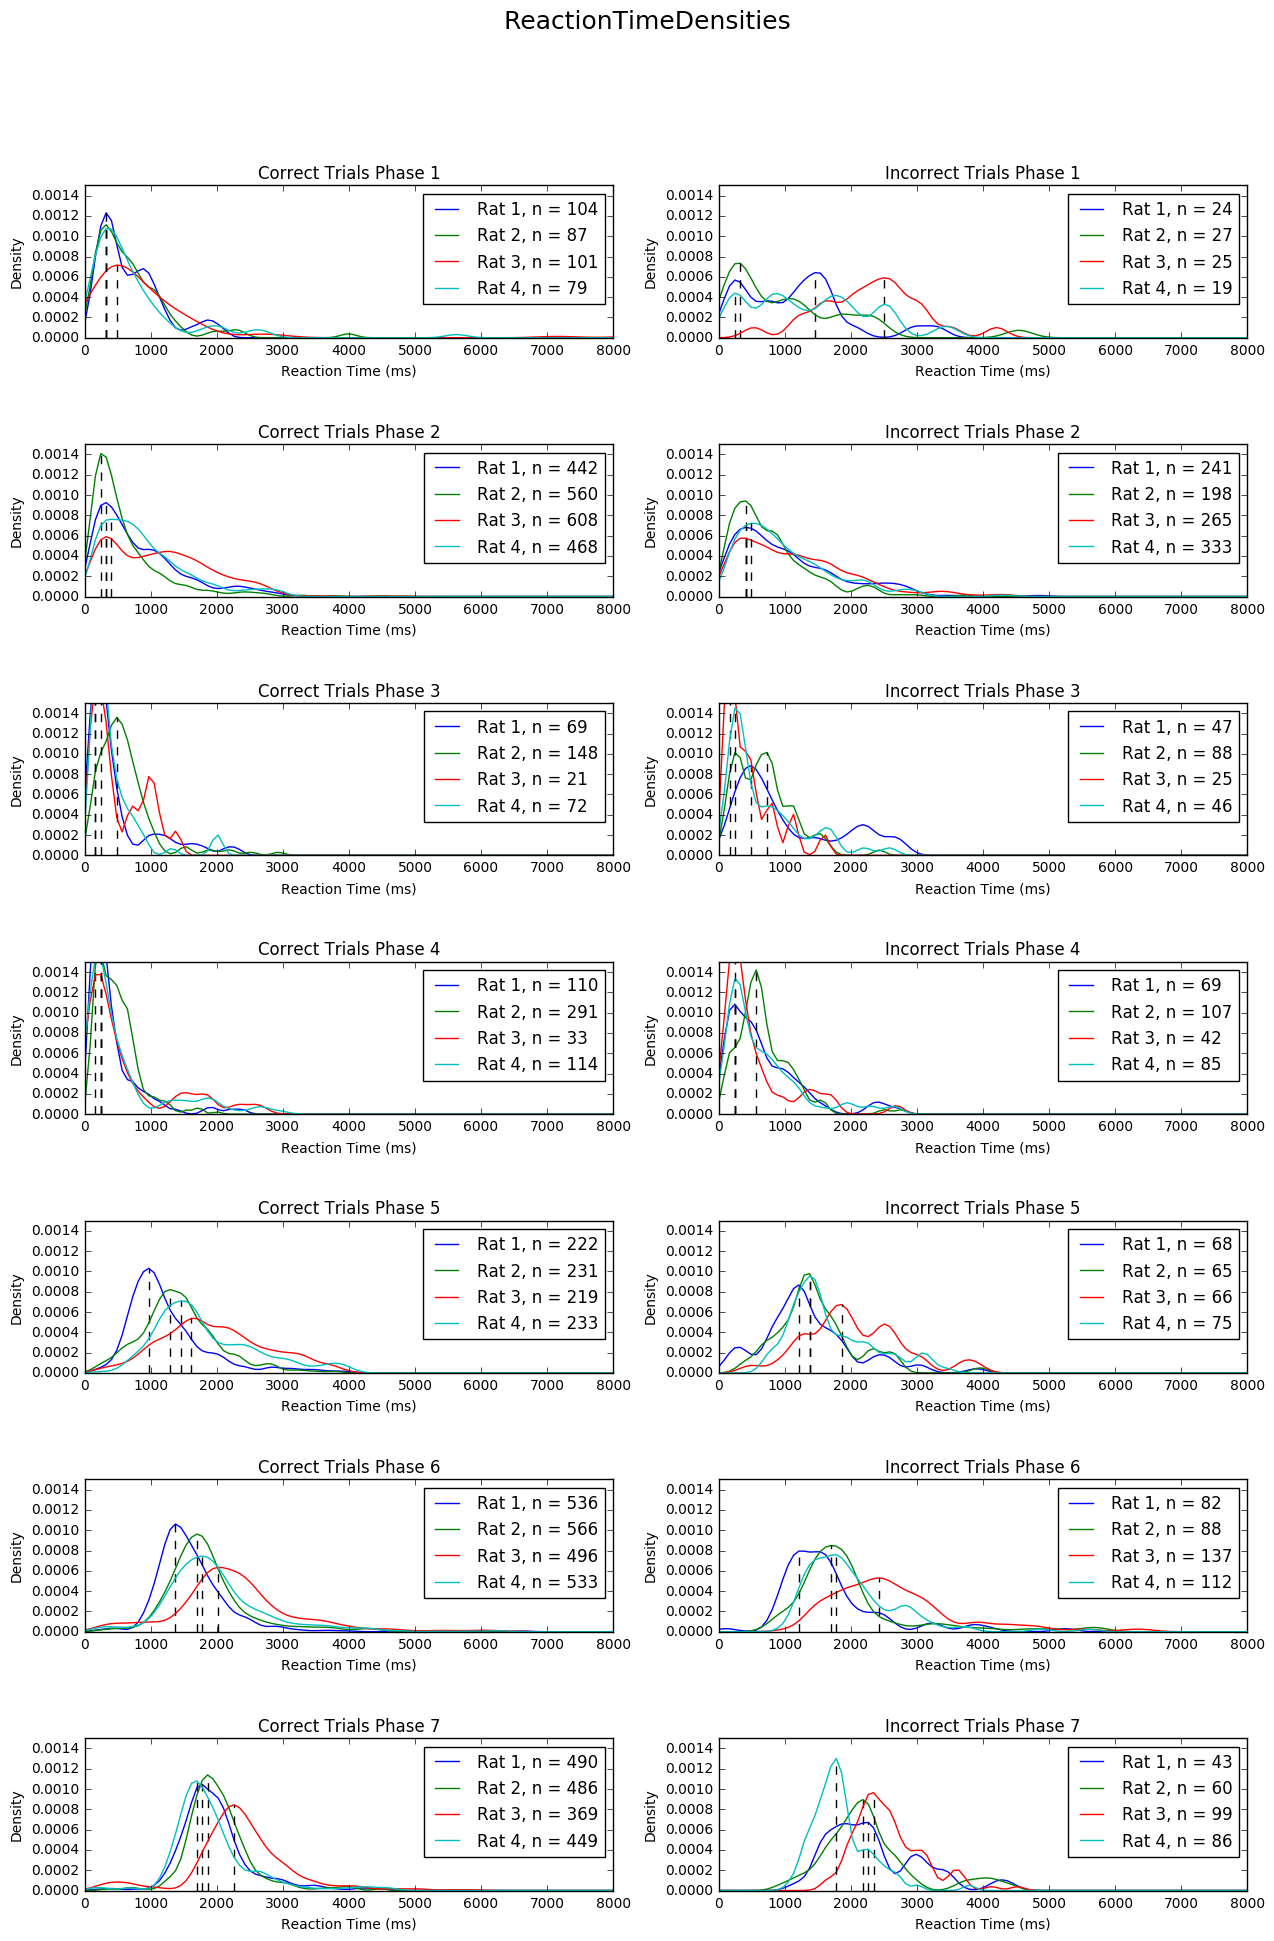

In [25]:
computeDensityPerPhase(rt, correct, incorrect)

In [10]:
AvgPerAnimal = pd.concat([rt[correct].groupby(level = "Phase").mean(),rt[incorrect].groupby(level = "Phase").mean()], axis = 1, keys =['correct','incorrect'])

In [18]:
AvgPerAnimal

correct                                           incorrect  \
Animal            1            2            3            4            1   
Phase                                                                     
1        693.596154   698.218391  1067.188119   751.797468  1166.500000   
2        827.986425   609.083929  1151.810855   899.341880  1035.199170   
3        477.855072   602.209459   510.000000   410.444444  1049.723404   
4        413.518182   481.309278   642.090909   583.122807   682.275362   
5       1249.369369  1437.727273  1969.456621  1831.094421  1359.779412   
6       1619.927239  1874.588339  2271.044355  1978.634146  1699.292683   
7       1973.493878  2022.831276  2359.189702  1918.962138  2339.581395   

                                               
Animal            2            3            4  
Phase                                          
1       1073.148148  2300.400000  1412.578947  
2        780.681818  1163.932075  1010.768769  
3        685.784091   449.960000   694.956522  
4        686.457944   566.214286   674.541176  
5       1486.738462  2037.075758  1699.586667  
6       1999.500000  2648.189781  2010.035714  
7       2266.200000  2567.474747  1843.686047

In [21]:
AvgAnimal = pd.concat([AvgPerAnimal['correct'].mean(axis = 1),AvgPerAnimal['incorrect'].mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

In [22]:
AvgAnimal

,correct,incorrect
Phase,,
1,802.700033,1488.156774
2,872.055772,997.645458
3,500.127244,720.106004
4,530.010294,652.372192
5,1621.911921,1645.795074
6,1936.048520,2089.254545
7,2068.619248,2254.235547


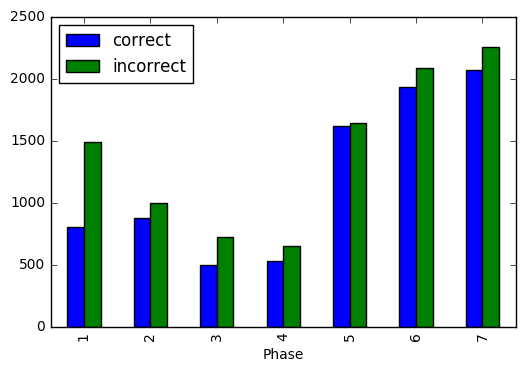

In [24]:
AvgAnimal.plot(kind = "bar")

In [26]:
StatsPerAnimal = pd.concat([rt[correct].groupby(level = "Phase").describe(),rt[incorrect].groupby(level = "Phase").describe()], axis = 1, keys =['correct','incorrect'])

In [27]:
StatsPerAnimal

correct                                           incorrect  \
Animal                 1            2            3            4            1   
Phase                                                                          
1     count   104.000000    87.000000   101.000000    79.000000    24.000000   
      mean    693.596154   698.218391  1067.188119   751.797468  1166.500000   
      std     483.834573   592.041588  1594.072180   814.003313   826.624461   
      min     102.000000   110.000000   122.000000   101.000000   145.000000   
      25%     321.750000   324.000000   383.000000   288.500000   469.500000   
      50%     541.500000   551.000000   614.000000   502.000000  1154.500000   
      75%     940.250000   885.000000  1110.000000   867.000000  1592.250000   
      max    2114.000000  3991.000000  9146.000000  5628.000000  3301.000000   
2     count   442.000000   560.000000   608.000000   468.000000   241.000000   
      mean    827.986425   609.083929  1151.810855   899.341880  1035.199170   
      std     657.106179   579.562044   776.835486   649.234333   799.130023   
      min     103.000000   101.000000   101.000000   101.000000   101.000000   
      25%     326.250000   236.000000   447.750000   411.500000   424.000000   
      50%     632.000000   406.000000  1086.000000   741.000000   816.000000   
      75%    1143.500000   781.750000  1665.250000  1212.750000  1461.000000   
      max    3299.000000  4521.000000  4815.000000  3078.000000  4837.000000   
3     count    69.000000   148.000000    21.000000    72.000000    47.000000   
      mean    477.855072   602.209459   510.000000   410.444444  1049.723404   
      std     513.396970   448.343288   402.383151   405.367644   798.834034   
      min     106.000000   108.000000   102.000000   101.000000   158.000000   
      25%     159.000000   327.500000   179.000000   179.750000   448.000000   
      50%     257.000000   514.000000   304.000000   267.500000   710.000000   
      75%     475.000000   722.500000   854.000000   458.000000  1645.000000   
      max    2293.000000  2934.000000  1381.000000  2016.000000  2736.000000   
4     count   110.000000   291.000000    33.000000   114.000000    69.000000   
      mean    413.518182   481.309278   642.090909   583.122807   682.275362   
      std     423.853007   317.508317   701.891790   665.217087   588.777170   
      min     102.000000   101.000000   103.000000   101.000000   102.000000   
      25%     165.250000   239.000000   160.000000   167.500000   245.000000   
      50%     245.500000   431.000000   300.000000   292.000000   510.000000   
      75%     459.750000   637.000000   760.000000   629.750000   954.000000   
      max    2384.000000  2004.000000  2620.000000  2954.000000  2707.000000   
5     count   222.000000   231.000000   219.000000   233.000000    68.000000   
      mean   1249.369369  1437.727273  1969.456621  1831.094421  1359.779412   
      std     625.107331   600.471090   789.678661   772.550138   714.535625   
      min     189.000000   183.000000   243.000000   234.000000   151.000000   
      25%     863.000000  1084.500000  1401.500000  1276.000000   941.250000   
      50%    1081.000000  1349.000000  1875.000000  1620.000000  1236.500000   
      75%    1456.000000  1766.500000  2482.000000  2282.000000  1672.500000   
      max    3956.000000  3785.000000  3895.000000  3979.000000  3901.000000   
6     count   536.000000   566.000000   496.000000   533.000000    82.000000   
      mean   1619.927239  1874.588339  2271.044355  1978.634146  1699.292683   
      std     588.891511   714.666949   935.283021   804.312357   805.429745   
      min     200.000000   198.000000   147.000000   143.000000   106.000000   
      25%    1290.000000  1502.500000  1812.750000  1509.000000  1215.750000   
      50%    1512.500000  1750.000000  2180.500000  1841.000000  1524.500000   
      75%    1825.000000  2045.500000  2602.250000  2243.000000  1861.500000   
      max    6629

In [34]:
MedPerAnimal = pd.concat([rt[correct].groupby(level = "Phase").median(),rt[incorrect].groupby(level = "Phase").median()], axis = 1, keys =['correct','incorrect'])

In [35]:
MedPerAnimal

correct                         incorrect                        
Animal       1       2       3       4         1       2       3       4
Phase                                                                   
1        541.5   551.0   614.0   502.0    1154.5   931.0  2345.0  1332.0
2        632.0   406.0  1086.0   741.0     816.0   591.5  1034.0   812.0
3        257.0   514.0   304.0   267.5     710.0   639.5   306.0   418.5
4        245.5   431.0   300.0   292.0     510.0   600.0   318.0   487.0
5       1081.0  1349.0  1875.0  1620.0    1236.5  1390.0  1949.5  1498.0
6       1512.5  1750.0  2180.5  1841.0    1524.5  1779.5  2485.0  1829.0
7       1901.5  1951.5  2317.0  1791.0    2206.0  2187.0  2462.0  1767.0

In [36]:
AvgMedAnimal = pd.concat([MedPerAnimal['correct'].mean(axis = 1),MedPerAnimal['incorrect'].mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

In [38]:
AvgMedAnimal


,correct,incorrect
Phase,,
1,552.125,1440.625
2,716.250,813.375
3,335.625,518.500
4,317.125,478.750
5,1481.250,1518.500
6,1821.000,1904.500
7,1990.250,2155.500


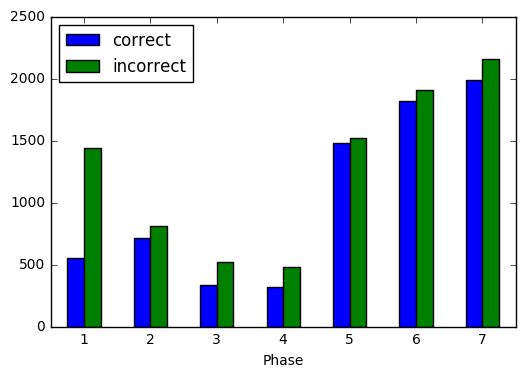

In [40]:
AvgMedAnimal.plot(kind = "bar", rot = 0)

In [61]:
z_stat, p_val = stats.ranksums(rt[correct], rt[incorrect]) 

In [12]:
# This isn't working quite yet, and not urgent so will drop it for now, but will keep the slicing as a reference, 
# there's a good chance it'll come in handy later. 

idx = pd.IndexSlice

sliceTestRt = rt.loc[idx[5:7]]
sliceTestCorrect = correct.loc[idx[5:7]]
sliceTestIncorrect = incorrect.loc[idx[5:7]]

#computeDensityPerPhase(rt.loc[idx[5:7]], correct.loc[idx[5:7]], incorrect.loc[idx[5:7]])

## Describing the Distributions

In [11]:
quartilesCorrect = rt[correct].groupby(level = "Phase").quantile([.25,.75])
quartilesIncorrect = rt[incorrect].groupby(level = "Phase").quantile([.25,.75])

In [12]:
quartilesCorrect

Animal            1        2        3        4
Phase                                         
1     0.25   321.75   324.00   383.00   288.50
      0.75   940.25   885.00  1110.00   867.00
2     0.25   326.25   236.00   447.75   411.50
      0.75  1143.50   781.75  1665.25  1212.75
3     0.25   159.00   327.50   179.00   179.75
      0.75   475.00   722.50   854.00   458.00
4     0.25   165.25   239.00   160.00   167.50
      0.75   459.75   637.00   760.00   629.75
5     0.25   863.00  1084.50  1401.50  1276.00
      0.75  1456.00  1766.50  2482.00  2282.00
6     0.25  1290.00  1502.50  1812.75  1509.00
      0.75  1825.00  2045.50  2602.25  2243.00
7     0.25  1670.25  1744.75  2040.00  1574.00
      0.75  2145.00  2212.00  2671.00  2083.00

In [13]:
iqrCorrect = quartilesCorrect.xs(0.75, level = 1) - quartilesCorrect.xs(0.25, level = 1)
iqrIncorrect = quartilesIncorrect.xs(0.75, level = 1) - quartilesIncorrect.xs(0.25, level = 1)

In [14]:
iqr = pd.concat([iqrCorrect,iqrIncorrect], axis = 1, keys =['correct','incorrect'])

In [15]:
iqr

correct                          incorrect                           
Animal       1       2       3        4         1        2        3        4
Phase                                                                       
1       618.50  561.00   727.0   578.50   1122.75  1225.50   945.00  1219.50
2       817.25  545.75  1217.5   801.25   1037.00   663.00  1159.00   940.00
3       316.00  395.00   675.0   278.25   1197.00   577.50   392.00   698.25
4       294.50  398.00   600.0   462.25    709.00   460.50   453.00   591.00
5       593.00  682.00  1080.5  1006.00    731.25   579.00   942.25   807.00
6       535.00  543.00   789.5   734.00    645.75   542.00  1040.00   755.50
7       474.75  467.25   631.0   509.00   1044.00   580.25   615.50   437.50

In [118]:
iqr["correct"].ix[5:7]

Animal,1,2,3,4
Phase,,,,
5,593.00,682.00,1080.5,1006
6,535.00,543.00,789.5,734
7,474.75,467.25,631.0,509


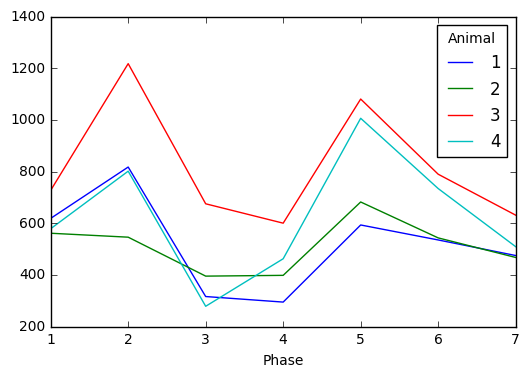

In [16]:
iqr["correct"].plot()

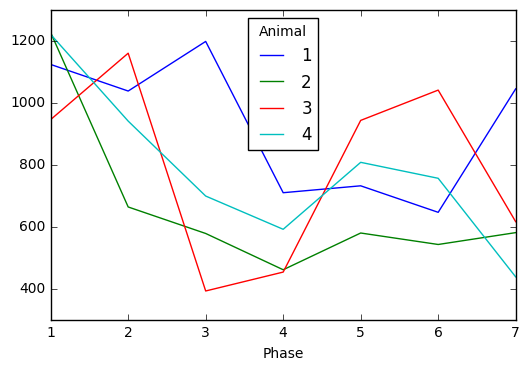

In [17]:
iqr["incorrect"].plot()
#iqr["incorrect"].ix[5:7].mean(axis = 1).plot()

In [20]:
iqrAvgAnimal = pd.concat([iqr['correct'].mean(axis = 1),iqr['incorrect'].mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

In [21]:
iqrAvgAnimal

,correct,incorrect
Phase,,
1,621.2500,1128.1875
2,845.4375,949.7500
3,416.0625,716.1875
4,438.6875,553.3750
5,840.3750,764.8750
6,650.3750,745.8125
7,520.5000,669.3125


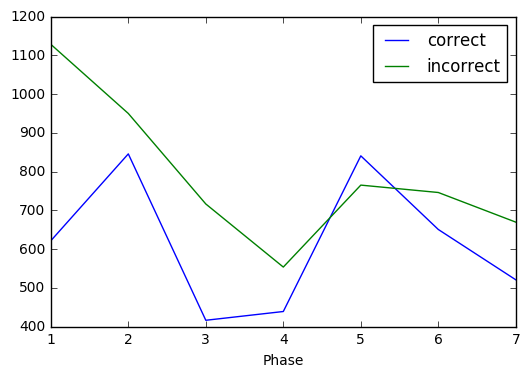

In [22]:
iqrAvgAnimal.plot()

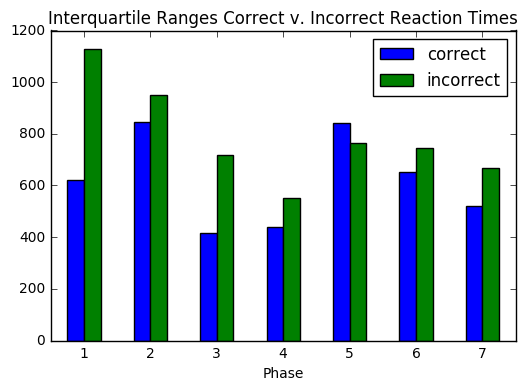

In [23]:
iqrAvgAnimal.plot(kind="bar", title = "Interquartile Ranges Correct v. Incorrect Reaction Times",rot =0)

These interquartile ranges are not as impressive now that the incorrect selection is actually calculated properly (really excluding all the cancelled, timed out trials, etc). 

### Boxplots

1         Axes(0.1,0.679412;0.235294x0.220588)
2    Axes(0.382353,0.679412;0.235294x0.220588)
3    Axes(0.664706,0.679412;0.235294x0.220588)
4         Axes(0.1,0.414706;0.235294x0.220588)
5    Axes(0.382353,0.414706;0.235294x0.220588)
6    Axes(0.664706,0.414706;0.235294x0.220588)
7             Axes(0.1,0.15;0.235294x0.220588)
dtype: object

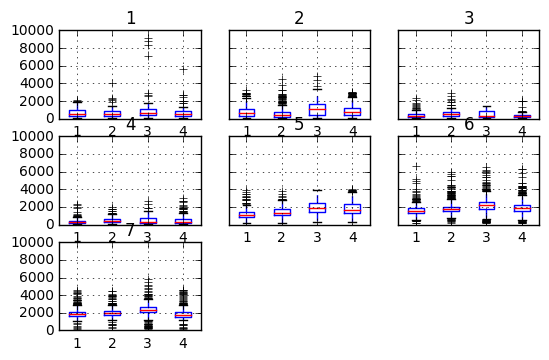

In [11]:
rt[correct].groupby(level = "Phase").boxplot(return_type = 'axes')

1         Axes(0.1,0.679412;0.235294x0.220588)
2    Axes(0.382353,0.679412;0.235294x0.220588)
3    Axes(0.664706,0.679412;0.235294x0.220588)
4         Axes(0.1,0.414706;0.235294x0.220588)
5    Axes(0.382353,0.414706;0.235294x0.220588)
6    Axes(0.664706,0.414706;0.235294x0.220588)
7             Axes(0.1,0.15;0.235294x0.220588)
dtype: object

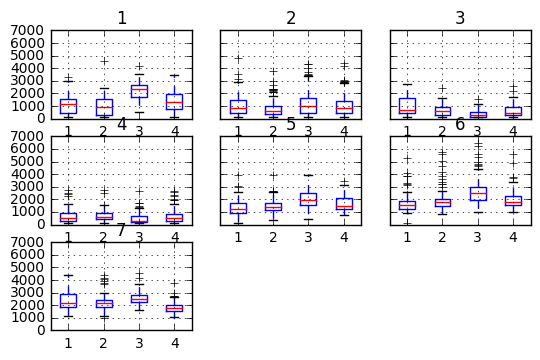

In [12]:
rt[incorrect].groupby(level = "Phase").boxplot(return_type = 'axes')

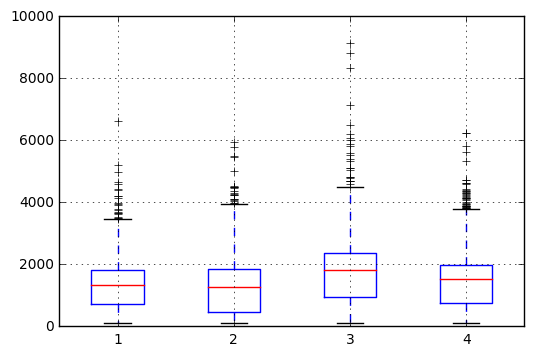

In [14]:
rt[correct].boxplot(return_type = 'axes')

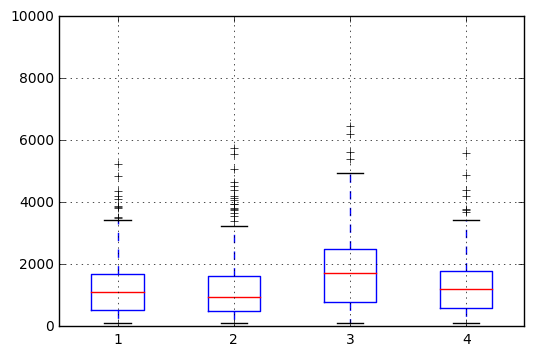

In [23]:
ax = rt[incorrect].boxplot(return_type = 'axes')
ax.set_ylim(0,10000)
plt.show()

In [32]:
rt[correct]

Animal                      1       2       3       4
Phase Day Block Trial                                
1     1   1     1         NaN   188.0   559.0   399.0
                2       102.0     NaN  1276.0   327.0
                3         NaN   490.0   574.0   414.0
                4         NaN   471.0   383.0   359.0
                5         NaN   462.0     NaN     NaN
                6         NaN     NaN   422.0   392.0
                7      1816.0  1013.0     NaN     NaN
                8       303.0   655.0   218.0     NaN
                9         NaN  1013.0     NaN   207.0
                10      140.0     NaN     NaN     NaN
          2     1       389.0   477.0  1084.0   770.0
                2      1040.0  1206.0     NaN     NaN
                3         NaN   651.0     NaN   730.0
                4         NaN   595.0     NaN   420.0
                5       412.0   668.0   281.0  1068.0
                6         NaN   707.0     NaN  1357.0
                7       108.0   150.0  1110.0   767.0
                8         NaN   819.0  1520.0   578.0
                9       461.0     NaN     NaN     NaN
                10        NaN   433.0  8348.0     NaN
          3     1      1082.0  1318.0   271.0   353.0
                2         NaN     NaN     NaN     NaN
                3       212.0   193.0   453.0   589.0
                4         NaN     NaN   435.0   212.0
                5         NaN   213.0     NaN   882.0
                6         NaN     NaN     NaN   812.0
                7       507.0     NaN     NaN   434.0
                8       441.0  1111.0   122.0   422.0
                9       206.0   404.0   373.0   596.0
                10      448.0   807.0  1406.0  2022.0
...                       ...     ...     ...     ...
7     6   3     21        NaN  1453.0     NaN     NaN
                22        NaN  1605.0     NaN  2149.0
                23      731.0  2181.0     NaN  2066.0
                24        NaN  1336.0     NaN  1452.0
                25     2087.0  1900.0     NaN  2609.0
          4     1         NaN     NaN  1789.0     NaN
                2      1122.0     NaN  1900.0  3133.0
                3         NaN     NaN  2380.0     NaN
                4      1479.0  1905.0  1777.0  1134.0
                5         NaN  1775.0     NaN  1487.0
                6      1313.0     NaN  1884.0     NaN
                7      1776.0  1933.0     NaN     NaN
                8      1672.0  1434.0     NaN  1537.0
                9      1986.0  1650.0     NaN  1537.0
                10        NaN  1915.0     NaN  1672.0
                11     1252.0  2217.0     NaN  1730.0
                12     1260.0  1770.0  1879.0  1574.0
                13     1301.0  2149.0  2068.0  1702.0
                14     1780.0  1374.0     NaN  2434.0
                15        NaN  1730.0  2159.0     NaN
                16        NaN  2039.0  2150.0     NaN
                17     1780.0  1798.0     NaN     NaN
                18     4156.0  1761.0     NaN  3102.0
                19     1768.0  1868.0  2346.0     NaN
                20     1532.0  1857.0  3129.0  1143.0
                21     1933.0  1673.0     NaN  1755.0
                22     1544.0  2114.0   290.0  1535.0
                23     2122.0     NaN  1787.0  2358.0
                24     1513.0   645.0     NaN  1481.0
                25     1909.0  1575.0     NaN   738.0

[4365 rows x 4 columns]

In [31]:
rt[incorrect] 

Animal                      1       2       3       4
Phase Day Block Trial                                
1     1   1     1      1608.0     NaN     NaN     NaN
                2         NaN     NaN     NaN     NaN
                3      1103.0     NaN     NaN     NaN
                4       783.0     NaN     NaN     NaN
                5         NaN     NaN     NaN     NaN
                6         NaN     NaN     NaN     NaN
                7         NaN     NaN     NaN     NaN
                8         NaN     NaN     NaN     NaN
                9         NaN     NaN     NaN     NaN
                10        NaN     NaN     NaN     NaN
          2     1         NaN     NaN     NaN     NaN
                2         NaN     NaN     NaN     NaN
                3         NaN     NaN     NaN     NaN
                4         NaN     NaN     NaN     NaN
                5         NaN     NaN     NaN     NaN
                6         NaN     NaN     NaN     NaN
                7         NaN     NaN     NaN     NaN
                8         NaN     NaN     NaN     NaN
                9         NaN     NaN     NaN     NaN
                10        NaN     NaN     NaN     NaN
          3     1         NaN     NaN     NaN     NaN
                2         NaN     NaN     NaN  1005.0
                3         NaN     NaN     NaN     NaN
                4         NaN     NaN     NaN     NaN
                5         NaN     NaN     NaN     NaN
                6         NaN     NaN     NaN     NaN
                7         NaN     NaN     NaN     NaN
                8         NaN     NaN     NaN     NaN
                9         NaN     NaN     NaN     NaN
                10        NaN     NaN     NaN     NaN
...                       ...     ...     ...     ...
7     6   3     21        NaN     NaN     NaN     NaN
                22        NaN     NaN     NaN     NaN
                23        NaN     NaN     NaN     NaN
                24        NaN     NaN     NaN     NaN
                25        NaN     NaN     NaN     NaN
          4     1         NaN     NaN     NaN     NaN
                2         NaN     NaN     NaN     NaN
                3         NaN     NaN     NaN     NaN
                4         NaN     NaN     NaN     NaN
                5      1622.0     NaN     NaN     NaN
                6         NaN  1609.0     NaN     NaN
                7         NaN     NaN     NaN  1074.0
                8         NaN     NaN     NaN     NaN
                9         NaN     NaN     NaN     NaN
                10     1185.0     NaN     NaN     NaN
                11        NaN     NaN     NaN     NaN
                12        NaN     NaN     NaN     NaN
                13        NaN     NaN     NaN     NaN
                14        NaN     NaN  3569.0     NaN
                15        NaN     NaN     NaN  1311.0
                16        NaN     NaN     NaN     NaN
                17        NaN     NaN     NaN     NaN
                18        NaN     NaN     NaN     NaN
                19        NaN     NaN     NaN  2098.0
                20        NaN     NaN     NaN     NaN
                21        NaN     NaN     NaN     NaN
                22        NaN     NaN     NaN     NaN
                23        NaN     NaN     NaN     NaN
                24        NaN     NaN     NaN     NaN
                25        NaN     NaN     NaN     NaN

[4365 rows x 4 columns]

In [34]:
rt[incorrect]["1"]

Phase  Day  Block  Trial
1      1    1      1        1608.0
                   2           NaN
                   3        1103.0
                   4         783.0
                   5           NaN
                   6           NaN
                   7           NaN
                   8           NaN
                   9           NaN
                   10          NaN
            2      1           NaN
                   2           NaN
                   3           NaN
                   4           NaN
                   5           NaN
                   6           NaN
                   7           NaN
                   8           NaN
                   9           NaN
                   10          NaN
            3      1           NaN
                   2           NaN
                   3           NaN
                   4           NaN
                   5           NaN
                   6           NaN
                   7           NaN
                   8          

In [30]:
rt["1"][incorrect["1"]]   #.groupby(level = "Phase").boxplot(return_type = 'axes')

Phase  Day  Block  Trial
1      1    1      1        1608.0
                   3        1103.0
                   4         783.0
       2    2      5        1510.0
       3    2      1         274.0
                   4         153.0
       4    1      1           NaN
            2      1         145.0
                   4        1206.0
                   5        1651.0
                   7        1354.0
            3      4        1587.0
                   5         724.0
                   6        2038.0
       5    1      3           NaN
                   6        1640.0
                   9        3301.0
            2      4         271.0
                   9         210.0
            3      4           NaN
       6    1      1         496.0
            2      2        1385.0
                   3         784.0
            3      3        1096.0
                   4         390.0
                   10       1330.0
       7    1      1           NaN
                   6        29

Perhaps the problem is rat 3 (who had the most trouble learning), I'll take him out and see what happends

In [40]:
idx = pd.IndexSlice
cor = iqr.loc[idx[:],idx['correct',['1','2','4']]]
incor = iqr.loc[idx[:],idx['incorrect',['1','2','4']]]


In [45]:
cor

correct                 
Animal       1       2        4
Phase                          
1       618.50  561.00   578.50
2       817.25  545.75   801.25
3       316.00  395.00   278.25
4       294.50  398.00   462.25
5       593.00  682.00  1006.00
6       535.00  543.00   734.00
7       474.75  467.25   509.00

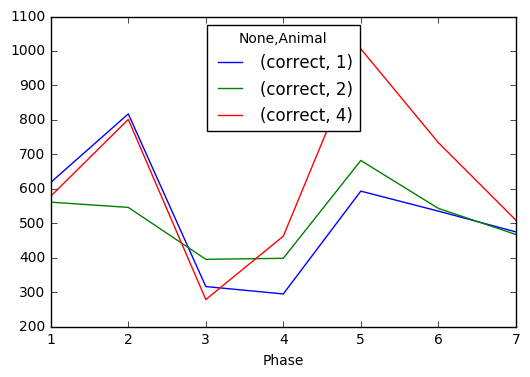

In [46]:
cor.plot()

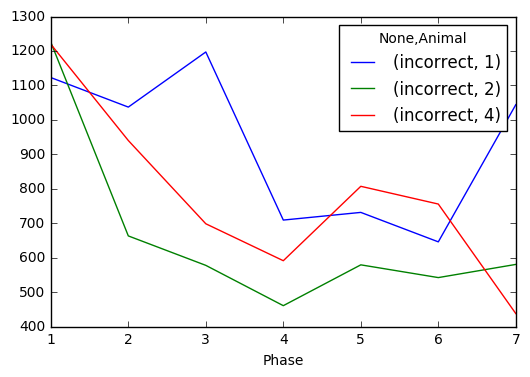

In [48]:
incor.plot()

well, nothing spectacular...

In [41]:
iqrAvgAnimalSansDumb = pd.concat([cor.mean(axis = 1),incor.mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

In [42]:
iqrAvgAnimalSansDumb

,correct,incorrect
Phase,,
1,586.000000,1189.250000
2,721.416667,880.000000
3,329.750000,824.250000
4,384.916667,586.833333
5,760.333333,705.750000
6,604.000000,647.750000
7,483.666667,687.250000


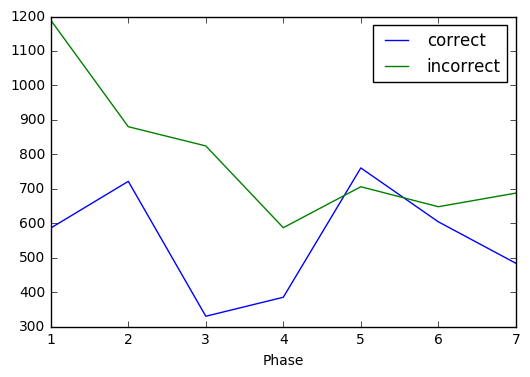

In [38]:
iqrAvgAnimalSansDumb.plot()


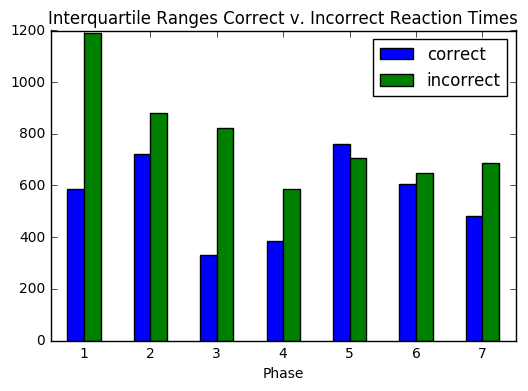

In [39]:
iqrAvgAnimalSansDumb.plot(kind="bar", title = "Interquartile Ranges Correct v. Incorrect Reaction Times",rot =0)

Not much different apparently, but when looking at the densities there was a definite difference between the correct and incorrect trials. 

### Skewedness and Kurtosis of peaks

In [55]:
skewdness = pd.concat([rt[correct].stack().groupby(level = ["Phase","Animal"]).skew(),rt[incorrect].stack().groupby(level = ["Phase","Animal"]).skew()], axis = 1, keys =[('skewdness', 'correct'), ('skewdness','incorrect')])



In [59]:
skewdness.unstack()

skewdness                                                              \
         correct                               incorrect                       
Animal         1         2         3         4         1         2         3   
Phase                                                                          
1       1.148914  2.697986  4.038624  3.410860  0.939565  1.738146  0.074425   
2       1.259065  2.475460  0.716696  1.237138  1.235919  1.630198  1.133150   
3       1.977566  2.495344  0.761983  2.787471  0.845679  1.101293  1.504740   
4       2.704739  1.634987  1.531365  1.867582  1.714452  1.877698  1.974772   
5       1.755643  0.762322  0.277337  0.903977  0.992368  1.171943  0.441252   
6       2.744804  2.110255  1.018238  1.535729  1.965619  2.243289  1.405616   
7       1.383610  1.366819  0.414923  1.591441  0.984765  1.248644  1.042786   

                  
                  
Animal         4  
Phase             
1       0.438443  
2       1.320544  
3       1.424605  
4       1.695074  
5       0.910358  
6       1.976635  
7       1.404244

In [75]:
avgSkew = skewdness.groupby(level = ["Phase"]).mean()

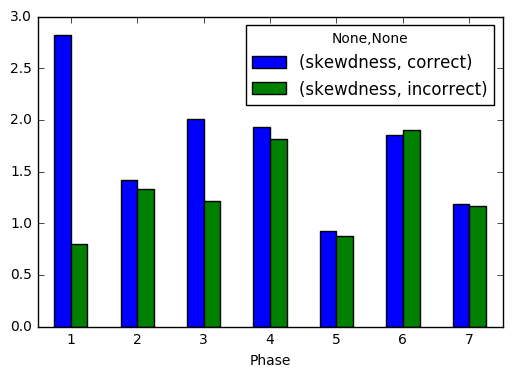

In [77]:
avgSkew.plot(kind = "bar", rot = 0)

In [42]:
def getkurt(group):
    return group.kurt()


kurtosis = pd.concat([rt[correct].stack().groupby(level = ["Phase","Animal"]).apply(getkurt),rt[incorrect].stack().groupby(level = ["Phase","Animal"]).apply(getkurt)], axis = 1, keys =[('kurtosis', 'correct'), ('kurtosis','incorrect')])


In [87]:
kurtosis

kurtosis          
                correct incorrect
Phase Animal                     
1     1        0.822444  1.004536
      2       11.026469  4.089091
      3       16.848237  0.594562
      4       16.264921 -0.494404
2     1        1.156202  1.752515
      2        8.195325  3.496778
      3        0.460328  1.334183
      4        1.236461  2.181912
3     1        3.289297 -0.696355
      2        8.333417  1.976625
      3       -0.767021  2.006007
      4        8.381101  1.566194
4     1        8.213184  3.066837
      2        3.836393  6.047637
      3        1.325714  4.096874
      4        2.689401  2.622408
5     1        3.791217  1.770988
      2        1.369550  2.868337
      3       -0.428183  0.264907
      4        0.335562  0.102333
6     1       15.610444  5.174645
      2        7.247993  5.494922
      3        3.105506  2.550744
      4        4.777494  6.093564
7     1        4.305635  0.734561
      2        5.229643  1.830240
      3        3.415503  1.498691
      4        4.859262  3.680262

In [47]:
avgKurt = kurtosis.groupby(level = ["Phase"]).mean()

In [48]:
avgKurt

kurtosis          
         correct incorrect
Phase                     
1      11.240518  1.298446
2       2.762079  2.191347
3       4.809198  1.213118
4       4.016173  3.958439
5       1.267036  1.251641
6       7.685359  4.828469
7       4.452511  1.935939

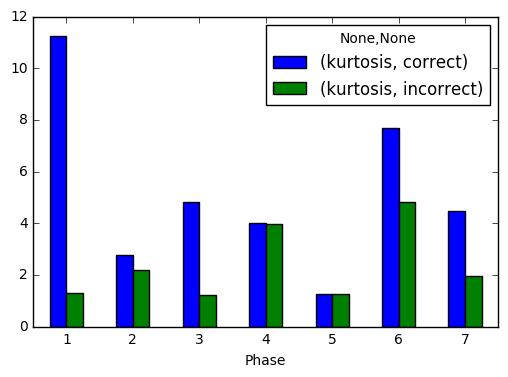

In [49]:
avgKurt.plot(kind = "bar", rot = 0)

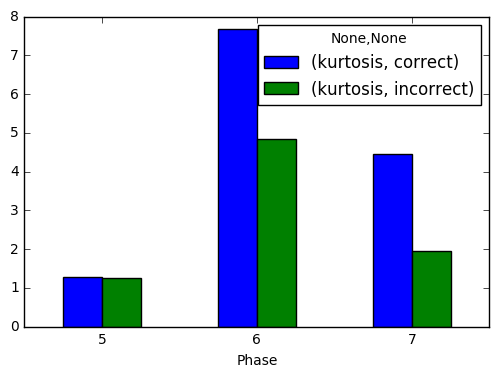

In [50]:
avgKurt.ix[5:7].plot(kind = "bar", rot = 0)

In [51]:
avgKurtPhase5to7 = avgKurt.ix[5:7].mean()

In [52]:
avgKurtPhase5to7

kurtosis  correct      4.468302
          incorrect    2.672016
dtype: float64

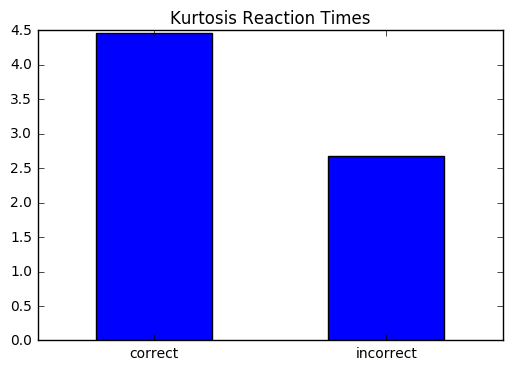

In [57]:
ax =avgKurtPhase5to7.plot(kind = "bar")
ax.set_xticklabels(['correct', 'incorrect'], rotation=0)
ax.set_title('Kurtosis Reaction Times')

In [43]:
avgKurtAll = kurtosis.mean()

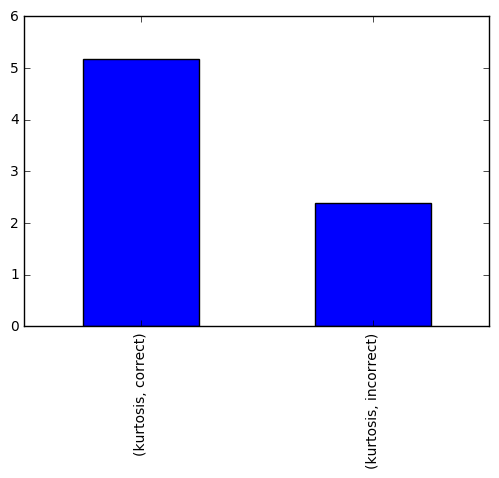

In [45]:
avgKurtAll.plot(kind = "bar")

Perhaps compare each animal seperately instead of grouping them? 

## Correct & Incorrect Determined From Scoring Rewards Given Per Phase

In [11]:
# correct and incorrect from reward based scoring
rt,correct,incorrect = testRTbasedOnPhaseScoring(Adat,Mdat)
rt = rt[~np.isnan(choices)]

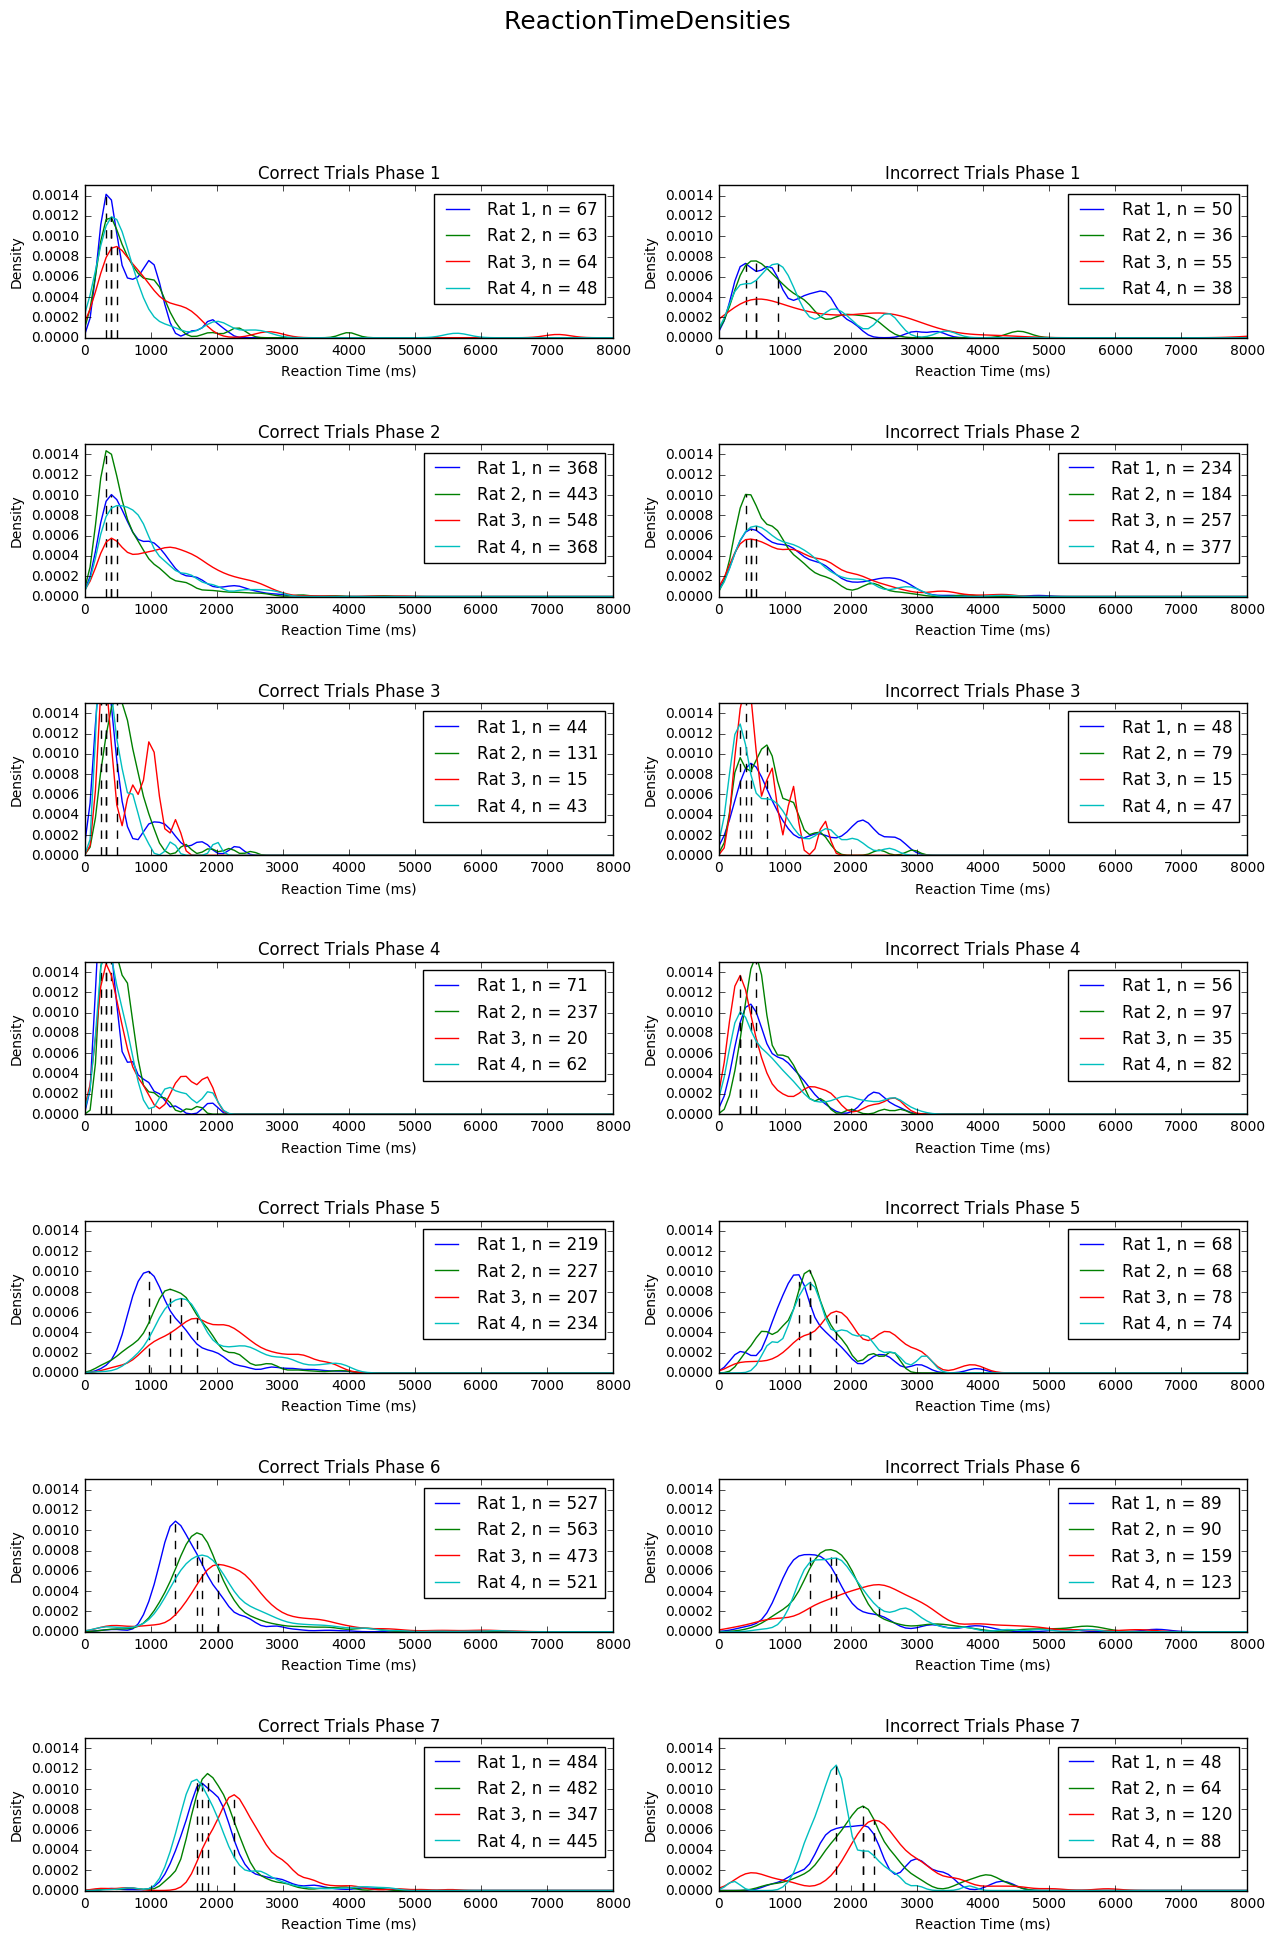

In [12]:
computeDensityPerPhase(rt, correct, incorrect)

In [13]:
quartilesCorrect = rt[correct].groupby(level = "Phase").quantile([.25,.75])
quartilesIncorrect = rt[incorrect].groupby(level = "Phase").quantile([.25,.75])

In [14]:
iqrCorrect = quartilesCorrect.xs(0.75, level = 1) - quartilesCorrect.xs(0.25, level = 1)
iqrIncorrect = quartilesIncorrect.xs(0.75, level = 1) - quartilesIncorrect.xs(0.25, level = 1)

In [15]:
iqr = pd.concat([iqrCorrect,iqrIncorrect], axis = 1, keys =['correct','incorrect'])

In [17]:
iqrAvgAnimal = pd.concat([iqr['correct'].mean(axis = 1),iqr['incorrect'].mean(axis = 1)], axis = 1, keys =['correct','incorrect'])

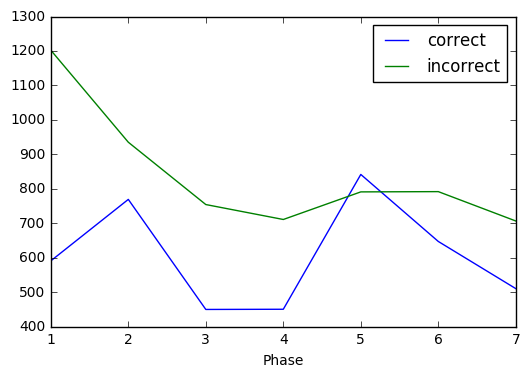

In [18]:
iqrAvgAnimal.plot()

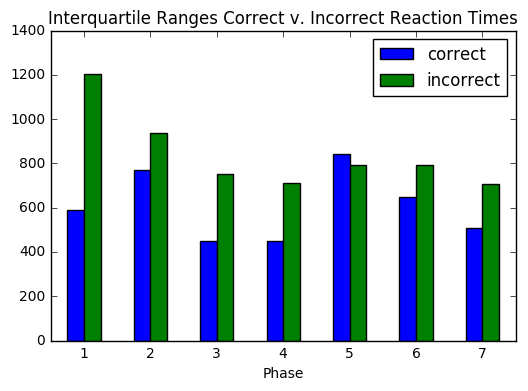

In [19]:
iqrAvgAnimal.plot(kind="bar", title = "Interquartile Ranges Correct v. Incorrect Reaction Times",rot =0)

In [20]:
skewdness = pd.concat([rt[correct].stack().groupby(level = ["Phase","Animal"]).skew(),rt[incorrect].stack().groupby(level = ["Phase","Animal"]).skew()], axis = 1, keys =[('skewdness', 'correct'), ('skewdness','incorrect')])


In [21]:
avgSkew = skewdness.groupby(level = ["Phase"]).mean()

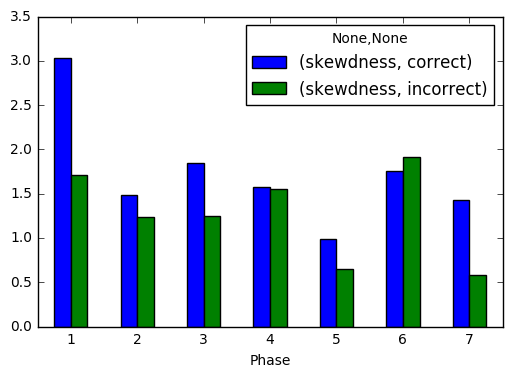

In [22]:
avgSkew.plot(kind = "bar", rot = 0)

In [23]:
def getkurt(group):
    return group.kurt()


kurtosis = pd.concat([rt[correct].stack().groupby(level = ["Phase","Animal"]).apply(getkurt),rt[incorrect].stack().groupby(level = ["Phase","Animal"]).apply(getkurt)], axis = 1, keys =[('kurtosis', 'correct'), ('kurtosis','incorrect')])


In [24]:
avgKurt = kurtosis.groupby(level = ["Phase"]).mean()

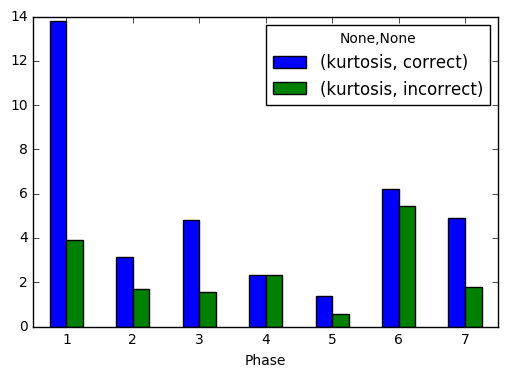

In [25]:
avgKurt.plot(kind = "bar", rot = 0)